In [3]:
import yfinance as yf
import requests
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Task 1

In [4]:
data = yf.download(['A', 'AA', 'AAP', 'AAPL', 'ABG', 'ACWI', 'ADX'], period='1mo')
data['Close']

[*********************100%%**********************]  7 of 7 completed


,A,AA,AAP,AAPL,ABG,ACWI,ADX
Date,,,,,,,
2023-12-26,139.809998,33.869999,60.919998,193.050003,223.330002,101.669998,17.730000
2023-12-27,139.820007,34.810001,61.560001,193.149994,223.990005,101.959999,17.760000
2023-12-28,139.770004,34.549999,61.490002,193.580002,227.479996,101.959999,17.750000
2023-12-29,139.029999,34.000000,61.029999,192.529999,224.970001,101.769997,17.709999
2024-01-02,138.750000,33.310001,61.950001,185.639999,222.839996,100.900002,17.450001
2024-01-03,131.160004,31.490000,61.000000,184.250000,208.669998,100.099998,17.240000
2024-01-04,131.000000,31.129999,60.490002,181.910004,207.000000,99.989998,17.190001
2024-01-05,130.559998,32.130001,61.520000,181.179993,205.539993,100.080002,17.320000
2024-01-08,133.380005,31.730000,61.910000,185.559998,208.750000,101.279999,17.500000


In [5]:
returns = data['Close'].pct_change().dropna()
returns

,A,AA,AAP,AAPL,ABG,ACWI,ADX
Date,,,,,,,
2023-12-27,0.000072,0.027753,0.010506,0.000518,0.002955,0.002852,0.001692
2023-12-28,-0.000358,-0.007469,-0.001137,0.002226,0.015581,0.000000,-0.000563
2023-12-29,-0.005294,-0.015919,-0.007481,-0.005424,-0.011034,-0.001863,-0.002254
2024-01-02,-0.002014,-0.020294,0.015075,-0.035787,-0.009468,-0.008549,-0.014681
2024-01-03,-0.054703,-0.054638,-0.015335,-0.007488,-0.063588,-0.007929,-0.012034
2024-01-04,-0.001220,-0.011432,-0.008361,-0.012700,-0.008003,-0.001099,-0.002900
2024-01-05,-0.003359,0.032123,0.017028,-0.004013,-0.007053,0.000900,0.007562
2024-01-08,0.021599,-0.012449,0.006339,0.024175,0.015617,0.011990,0.010393
2024-01-09,-0.020243,0.006618,-0.008399,-0.002263,0.001437,-0.004542,-0.001714


In [6]:
correlation_matrix = returns.corr()
correlation_matrix

,A,AA,AAP,AAPL,ABG,ACWI,ADX
A,1.000000,0.334745,0.443809,0.492747,0.702843,0.695333,0.634381
AA,0.334745,1.000000,0.450803,0.291124,0.444854,0.521159,0.566144
AAP,0.443809,0.450803,1.000000,0.271886,0.513348,0.382851,0.345740
AAPL,0.492747,0.291124,0.271886,1.000000,0.375628,0.838864,0.808958
ABG,0.702843,0.444854,0.513348,0.375628,1.000000,0.432268,0.516660
ACWI,0.695333,0.521159,0.382851,0.838864,0.432268,1.000000,0.892728
ADX,0.634381,0.566144,0.345740,0.808958,0.516660,0.892728,1.000000


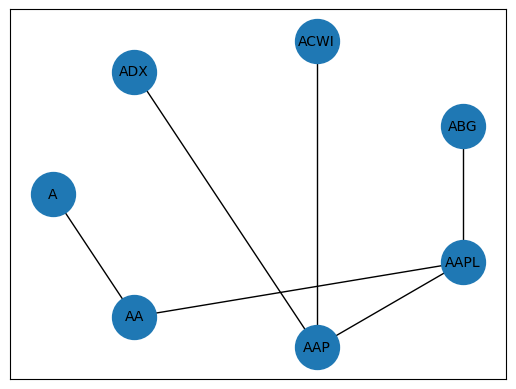

In [9]:
G = nx.Graph(correlation_matrix)
ST = nx.minimum_spanning_tree(G) 
existing_edges = ST.edges()
existing_edge_labels = {(u, v): round(ST[u][v]['weight'], 2) for u, v in existing_edges}
pos = nx.shell_layout(G)
nx.draw_networkx(ST, pos, font_size=10, node_size = 10**3)

Task 3

In [11]:
def flat_graph(nodes, edges_sort, n): 
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for edge in edges_sort:
        if edges_sort[edge] == 1: 
            continue
        check_planar_G = G.copy()
        check_planar_G.add_edge(edge[0], edge[1], weight = edges_sort[edge])
        if (nx.planarity.check_planarity(check_planar_G)[0] == False):
            return G
        else:
            G.add_edge(edge[0], edge[1], weight = edges_sort[edge])
            if (G.number_of_edges() >= 3*(n-2)):
                return G
    return G

In [12]:
n = len(G.nodes()) 
edges = nx.get_edge_attributes(G, 'weight')
edges_sort = dict(sorted(edges.items(), key=lambda kv: kv[1], reverse=True)) # сортировка рёбер по убыванию корреляции

G1 = flat_graph(G.nodes(), edges_sort, n)

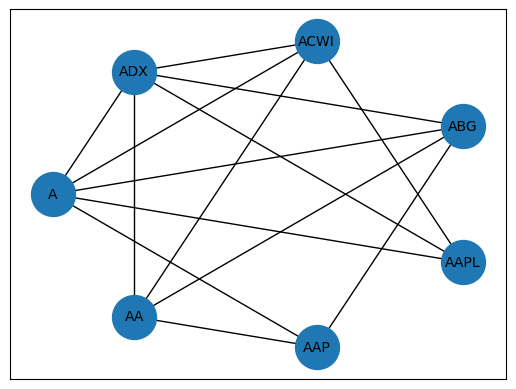

In [13]:
nx.draw_networkx(G1, pos, font_size=10, node_size = 10**3)

{('A', 'ABG'): Text(-0.04951554536819458, 0.21694177488354427, '0.7'),
 ('A', 'ACWI'): Text(-0.3887396529316902, 0.48746393720177394, '0.7'),
 ('A', 'ADX'): Text(-0.8117447793483734, 0.39091579715279323, '0.63'),
 ('A', 'AAPL'): Text(-0.04951557517051697, -0.21694192191096562, '0.49'),
 ('A', 'AAP'): Text(-0.3887394815683365, -0.48746399482222813, '0.44'),
 ('AA', 'ADX'): Text(-0.6234895884990692, 2.9802322387695312e-08, '0.57'),
 ('AA', 'ACWI'): Text(-0.20048446208238602, 0.0965481698513031, '0.52'),
 ('AA', 'AAP'): Text(-0.2004842907190323, -0.878379762172699, '0.45'),
 ('AA', 'ABG'): Text(0.13873964548110962, -0.17397399246692657, '0.44'),
 ('AAP', 'ABG'): Text(0.5617449730634689, -0.2705221325159073, '0.51'),
 ('AAPL', 'ACWI'): Text(0.5617447718977928, 0.2705221027135849, '0.84'),
 ('AAPL', 'ADX'): Text(0.13873964548110962, 0.1739739626646042, '0.81'),
 ('ABG', 'ADX'): Text(0.138739675283432, 0.6078576594591141, '0.52'),
 ('ACWI', 'ADX'): Text(-0.20048443228006363, 0.87837982177734

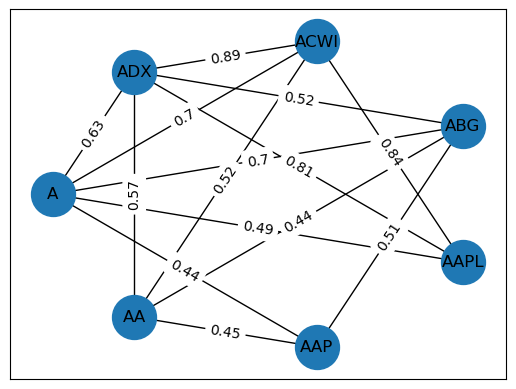

In [14]:
existing_edges_ = G1.edges()
existing_edge_labels_ = {(u, v): round(G1[u][v]['weight'], 2) for u, v in existing_edges_}
nx.draw_networkx(G1, pos, with_labels=True, node_size=10**3)
nx.draw_networkx_edge_labels(G1, pos, edge_labels=existing_edge_labels_)

In [15]:
nx.is_planar(G1)

True